# Constants

In [ ]:
WORK_DIR_PATH = ".."

# Split
FILTER_BY = "user"
TRN_VAL_TST_RATIO = [0.8, 0.1, 0.1]
TRN_NEG_PER_POS_RATIO = 1
NEG_PER_POS_RATIO = [TRN_NEG_PER_POS_RATIO, TRN_NEG_PER_POS_RATIO, 100, 100]
BATCH_SIZE = [128, 128, 1, 1]

# Model
N_FACTORS = 32
HIDDEN = [N_FACTORS*2, N_FACTORS*2, N_FACTORS, N_FACTORS // 2]
DROPOUT = 0.2
MODEL_NAME = "NeuMF"

# How to Learn
TASK_TYPE = 'bpr'
LEARNING_RATE = 1e-4
LAMBDA_ = 1e-2

# Fit
N_EPOCHS = 300

# Config

In [2]:
import warnings
warnings.filterwarnings("ignore")

import os
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"
os.chdir(WORK_DIR_PATH)
print(f"DIRECTORY: {os.getcwd()}")

DIRECTORY: c:\Users\jayar\Desktop\바탕 화면\RESEARCH-MLP


In [3]:
import json
import pandas as pd
import torch

In [4]:
import NeuMF
from MYUTILS import (
    ranking,
    utils,
)
from MYUTILS.config.constants import (
    DEFAULT_USER_COL,
    DEFAULT_ITEM_COL,
    DEFAULT_RATING_COL,
    DEFAULT_LABEL_COL,
    DEFAULT_TIMESTAMP_COL,
    DEFAULT_PREDICTION_COL,
    DEFAULT_K,
    SEED,
)

In [5]:
# Seed
utils.seed.reset(SEED)

SETTING ALL SEEDS TO 42...
ALL SEEDS SET


In [6]:
# Available GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


# Data Preparation

In [7]:
# JSON lines 형식의 파일 열기
with open('./data/amusic.json', 'r', encoding='utf-8') as f:
    records = [json.loads(line) for line in f]

# reviewerID와 asin만 추출
filtered_records = [{'reviewerID': r['reviewerID'], 'asin': r['asin']} for r in records]

# DataFrame으로 변환
data = pd.DataFrame(filtered_records)

In [8]:
# Columns
kwargs = dict(
    col_user='reviewerID', 
    col_item='asin', 
)

data = utils.data.rename_columns(data, **kwargs)


# Label encoding
kwargs = dict(
    data=data, 
    col_user=DEFAULT_USER_COL, 
    col_item=DEFAULT_ITEM_COL,
)

data, user_label, item_label = utils.data.label_encoding(**kwargs)


# Number of user, item
N_USERS = data[DEFAULT_USER_COL].nunique()
N_ITEMS = data[DEFAULT_ITEM_COL].nunique()

In [9]:
# data Description
utils.data.description(data)

number of user: 5541
number of item: 3568
total interaction: 64706
interaction density: 0.3273 %
max interaction of user: 578
top 10.0 % interaction of user: 20.0
mean interaction of user: 11
mean interaction of item: 18


In [10]:
kwargs = dict(
    data=data,
    n_users=N_USERS,
    n_items=N_ITEMS,
    col_user=DEFAULT_USER_COL,
    col_item=DEFAULT_ITEM_COL,
)

dataloader = ranking.trn_val_tst.Module(**kwargs)

kwargs = dict(
    filter_by=FILTER_BY,
    trn_val_tst_ratio=TRN_VAL_TST_RATIO,
    neg_per_pos=NEG_PER_POS_RATIO,
    batch_size=BATCH_SIZE,
    seed=SEED,
    )

loaders, _ = dataloader.get(**kwargs)
trn_loader, val_loader, tst_loader, loo_loader = loaders

# Modeling

In [11]:
kwargs = dict(
    n_users=N_USERS,
    n_items=N_ITEMS,
    n_factors=N_FACTORS,
    hidden=HIDDEN,
    dropout=DROPOUT,
    model_name=MODEL_NAME,
)

model = NeuMF.model.Module(**kwargs)

In [12]:
kwargs = dict(
    model=model,
    trn_neg_per_pos_ratio=TRN_NEG_PER_POS_RATIO,
    task_type=TASK_TYPE,
    lr=LEARNING_RATE,
    lambda_=LAMBDA_,
)

loop = NeuMF.loop.Module(**kwargs)

# Train

In [ ]:
kwargs = dict(
    trn_loader=trn_loader,
    val_loader=val_loader,
    n_epochs=N_EPOCHS,
)

history = loop.fit(**kwargs)

EPOCH 1 START ---->>>>


Epoch 1/50 TRN: 100%|██████████| 369/369 [00:02<00:00, 132.18it/s]


TRN TASK LOSS: 0.1052


Epoch 1/50 VAL: 100%|██████████| 46/46 [00:00<00:00, 369.91it/s]


VAL TASK LOSS: 0.2794


Epoch 2/50 TRN: 100%|██████████| 369/369 [00:02<00:00, 137.75it/s]


TRN TASK LOSS: 0.1028


Epoch 2/50 VAL: 100%|██████████| 46/46 [00:00<00:00, 385.86it/s]


VAL TASK LOSS: 0.3086


Epoch 3/50 TRN: 100%|██████████| 369/369 [00:02<00:00, 131.19it/s]


TRN TASK LOSS: 0.1039


Epoch 3/50 VAL: 100%|██████████| 46/46 [00:00<00:00, 461.10it/s]


VAL TASK LOSS: 0.2997


Epoch 4/50 TRN: 100%|██████████| 369/369 [00:02<00:00, 129.40it/s]


TRN TASK LOSS: 0.1056


Epoch 4/50 VAL: 100%|██████████| 46/46 [00:00<00:00, 545.55it/s]


VAL TASK LOSS: 0.3041


Epoch 5/50 TRN: 100%|██████████| 369/369 [00:02<00:00, 132.52it/s]


TRN TASK LOSS: 0.1017


Epoch 5/50 VAL: 100%|██████████| 46/46 [00:00<00:00, 434.06it/s]


VAL TASK LOSS: 0.2965


Epoch 6/50 TRN: 100%|██████████| 369/369 [00:02<00:00, 136.74it/s]


TRN TASK LOSS: 0.1017


Epoch 6/50 VAL: 100%|██████████| 46/46 [00:00<00:00, 427.63it/s]


VAL TASK LOSS: 0.3018


Epoch 7/50 TRN: 100%|██████████| 369/369 [00:02<00:00, 136.44it/s]


TRN TASK LOSS: 0.1040


Epoch 7/50 VAL: 100%|██████████| 46/46 [00:00<00:00, 410.04it/s]


VAL TASK LOSS: 0.3196


Epoch 8/50 TRN: 100%|██████████| 369/369 [00:02<00:00, 138.10it/s]


TRN TASK LOSS: 0.0998


Epoch 8/50 VAL: 100%|██████████| 46/46 [00:00<00:00, 464.95it/s]


VAL TASK LOSS: 0.3001


Epoch 9/50 TRN: 100%|██████████| 369/369 [00:02<00:00, 137.42it/s]


TRN TASK LOSS: 0.1033


Epoch 9/50 VAL: 100%|██████████| 46/46 [00:00<00:00, 452.38it/s]


VAL TASK LOSS: 0.2858


Epoch 10/50 TRN: 100%|██████████| 369/369 [00:02<00:00, 134.91it/s]


TRN TASK LOSS: 0.1022


Epoch 10/50 VAL: 100%|██████████| 46/46 [00:00<00:00, 472.04it/s]


VAL TASK LOSS: 0.3149
EPOCH 11 START ---->>>>


Epoch 11/50 TRN: 100%|██████████| 369/369 [00:02<00:00, 139.22it/s]


TRN TASK LOSS: 0.1022


Epoch 11/50 VAL: 100%|██████████| 46/46 [00:00<00:00, 467.20it/s]


VAL TASK LOSS: 0.2669


Epoch 12/50 TRN: 100%|██████████| 369/369 [00:02<00:00, 133.17it/s]


TRN TASK LOSS: 0.0980


Epoch 12/50 VAL: 100%|██████████| 46/46 [00:00<00:00, 472.84it/s]


VAL TASK LOSS: 0.3080


Epoch 13/50 TRN: 100%|██████████| 369/369 [00:02<00:00, 138.63it/s]


TRN TASK LOSS: 0.1011


Epoch 13/50 VAL: 100%|██████████| 46/46 [00:00<00:00, 445.83it/s]


VAL TASK LOSS: 0.2951


Epoch 14/50 TRN: 100%|██████████| 369/369 [00:02<00:00, 134.47it/s]


TRN TASK LOSS: 0.1002


Epoch 14/50 VAL: 100%|██████████| 46/46 [00:00<00:00, 438.48it/s]


VAL TASK LOSS: 0.3140


Epoch 15/50 TRN: 100%|██████████| 369/369 [00:02<00:00, 141.01it/s]


TRN TASK LOSS: 0.1009


Epoch 15/50 VAL: 100%|██████████| 46/46 [00:00<00:00, 407.18it/s]


VAL TASK LOSS: 0.2865


Epoch 16/50 TRN: 100%|██████████| 369/369 [00:02<00:00, 148.49it/s]


TRN TASK LOSS: 0.1004


Epoch 16/50 VAL: 100%|██████████| 46/46 [00:00<00:00, 459.42it/s]


VAL TASK LOSS: 0.3045


Epoch 17/50 TRN: 100%|██████████| 369/369 [00:02<00:00, 130.18it/s]


TRN TASK LOSS: 0.1010


Epoch 17/50 VAL: 100%|██████████| 46/46 [00:00<00:00, 534.60it/s]


VAL TASK LOSS: 0.3053


Epoch 18/50 TRN: 100%|██████████| 369/369 [00:02<00:00, 130.75it/s]


TRN TASK LOSS: 0.1002


Epoch 18/50 VAL: 100%|██████████| 46/46 [00:00<00:00, 412.58it/s]


VAL TASK LOSS: 0.3008


Epoch 19/50 TRN: 100%|██████████| 369/369 [00:02<00:00, 126.04it/s]


TRN TASK LOSS: 0.1017


Epoch 19/50 VAL: 100%|██████████| 46/46 [00:00<00:00, 521.04it/s]


VAL TASK LOSS: 0.2952


Epoch 20/50 TRN: 100%|██████████| 369/369 [00:03<00:00, 122.92it/s]


TRN TASK LOSS: 0.0975


Epoch 20/50 VAL: 100%|██████████| 46/46 [00:00<00:00, 444.55it/s]


VAL TASK LOSS: 0.2906
EPOCH 21 START ---->>>>


Epoch 21/50 TRN: 100%|██████████| 369/369 [00:02<00:00, 126.09it/s]


TRN TASK LOSS: 0.1002


Epoch 21/50 VAL: 100%|██████████| 46/46 [00:00<00:00, 461.16it/s]


VAL TASK LOSS: 0.2853


Epoch 22/50 TRN: 100%|██████████| 369/369 [00:02<00:00, 142.34it/s]


TRN TASK LOSS: 0.0997


Epoch 22/50 VAL: 100%|██████████| 46/46 [00:00<00:00, 503.49it/s]


VAL TASK LOSS: 0.2824


Epoch 23/50 TRN: 100%|██████████| 369/369 [00:02<00:00, 137.62it/s]


TRN TASK LOSS: 0.0996


Epoch 23/50 VAL: 100%|██████████| 46/46 [00:00<00:00, 455.25it/s]


VAL TASK LOSS: 0.2909


Epoch 24/50 TRN: 100%|██████████| 369/369 [00:02<00:00, 139.72it/s]


TRN TASK LOSS: 0.1006


Epoch 24/50 VAL: 100%|██████████| 46/46 [00:00<00:00, 500.36it/s]


VAL TASK LOSS: 0.2919


Epoch 25/50 TRN: 100%|██████████| 369/369 [00:02<00:00, 135.77it/s]


TRN TASK LOSS: 0.1009


Epoch 25/50 VAL: 100%|██████████| 46/46 [00:00<00:00, 565.28it/s]


VAL TASK LOSS: 0.2941


Epoch 26/50 TRN: 100%|██████████| 369/369 [00:02<00:00, 141.16it/s]


TRN TASK LOSS: 0.0992


Epoch 26/50 VAL: 100%|██████████| 46/46 [00:00<00:00, 450.50it/s]


VAL TASK LOSS: 0.2938


Epoch 27/50 TRN: 100%|██████████| 369/369 [00:02<00:00, 136.28it/s]


TRN TASK LOSS: 0.0984


Epoch 27/50 VAL: 100%|██████████| 46/46 [00:00<00:00, 501.89it/s]


VAL TASK LOSS: 0.2871


Epoch 28/50 TRN: 100%|██████████| 369/369 [00:02<00:00, 126.41it/s]


TRN TASK LOSS: 0.0974


Epoch 28/50 VAL: 100%|██████████| 46/46 [00:00<00:00, 472.57it/s]


VAL TASK LOSS: 0.2851


Epoch 29/50 TRN: 100%|██████████| 369/369 [00:02<00:00, 126.51it/s]


TRN TASK LOSS: 0.0994


Epoch 29/50 VAL: 100%|██████████| 46/46 [00:00<00:00, 465.73it/s]


VAL TASK LOSS: 0.3187


Epoch 30/50 TRN: 100%|██████████| 369/369 [00:02<00:00, 143.56it/s]


TRN TASK LOSS: 0.0989


Epoch 30/50 VAL: 100%|██████████| 46/46 [00:00<00:00, 471.40it/s]


VAL TASK LOSS: 0.2808
EPOCH 31 START ---->>>>


Epoch 31/50 TRN: 100%|██████████| 369/369 [00:02<00:00, 142.97it/s]


TRN TASK LOSS: 0.0982


Epoch 31/50 VAL: 100%|██████████| 46/46 [00:00<00:00, 518.11it/s]


VAL TASK LOSS: 0.2970


Epoch 32/50 TRN: 100%|██████████| 369/369 [00:02<00:00, 138.50it/s]


TRN TASK LOSS: 0.1021


Epoch 32/50 VAL: 100%|██████████| 46/46 [00:00<00:00, 459.25it/s]


VAL TASK LOSS: 0.3101


Epoch 33/50 TRN: 100%|██████████| 369/369 [00:02<00:00, 141.30it/s]


TRN TASK LOSS: 0.0979


Epoch 33/50 VAL: 100%|██████████| 46/46 [00:00<00:00, 533.84it/s]


VAL TASK LOSS: 0.3017


Epoch 34/50 TRN: 100%|██████████| 369/369 [00:02<00:00, 133.98it/s]


TRN TASK LOSS: 0.0986


Epoch 34/50 VAL: 100%|██████████| 46/46 [00:00<00:00, 452.43it/s]


VAL TASK LOSS: 0.2838


Epoch 35/50 TRN: 100%|██████████| 369/369 [00:02<00:00, 140.52it/s]


TRN TASK LOSS: 0.0963


Epoch 35/50 VAL: 100%|██████████| 46/46 [00:00<00:00, 460.54it/s]


VAL TASK LOSS: 0.3018


Epoch 36/50 TRN: 100%|██████████| 369/369 [00:02<00:00, 144.52it/s]


TRN TASK LOSS: 0.0960


Epoch 36/50 VAL: 100%|██████████| 46/46 [00:00<00:00, 468.94it/s]


VAL TASK LOSS: 0.3175


Epoch 37/50 TRN: 100%|██████████| 369/369 [00:02<00:00, 145.67it/s]


TRN TASK LOSS: 0.0954


Epoch 37/50 VAL: 100%|██████████| 46/46 [00:00<00:00, 444.11it/s]


VAL TASK LOSS: 0.2975


Epoch 38/50 TRN: 100%|██████████| 369/369 [00:02<00:00, 139.17it/s]


TRN TASK LOSS: 0.0983


Epoch 38/50 VAL: 100%|██████████| 46/46 [00:00<00:00, 460.37it/s]


VAL TASK LOSS: 0.2887


Epoch 39/50 TRN: 100%|██████████| 369/369 [00:02<00:00, 126.71it/s]


TRN TASK LOSS: 0.1000


Epoch 39/50 VAL: 100%|██████████| 46/46 [00:00<00:00, 467.69it/s]


VAL TASK LOSS: 0.3003


Epoch 40/50 TRN: 100%|██████████| 369/369 [00:02<00:00, 125.90it/s]


TRN TASK LOSS: 0.0963


Epoch 40/50 VAL: 100%|██████████| 46/46 [00:00<00:00, 444.36it/s]


VAL TASK LOSS: 0.2991
EPOCH 41 START ---->>>>


Epoch 41/50 TRN: 100%|██████████| 369/369 [00:03<00:00, 122.79it/s]


TRN TASK LOSS: 0.0971


Epoch 41/50 VAL: 100%|██████████| 46/46 [00:00<00:00, 423.47it/s]


VAL TASK LOSS: 0.2908


Epoch 42/50 TRN: 100%|██████████| 369/369 [00:02<00:00, 127.19it/s]


TRN TASK LOSS: 0.0976


Epoch 42/50 VAL: 100%|██████████| 46/46 [00:00<00:00, 396.86it/s]


VAL TASK LOSS: 0.3006


Epoch 43/50 TRN: 100%|██████████| 369/369 [00:02<00:00, 130.38it/s]


TRN TASK LOSS: 0.0990


Epoch 43/50 VAL: 100%|██████████| 46/46 [00:00<00:00, 376.47it/s]


VAL TASK LOSS: 0.2829


Epoch 44/50 TRN: 100%|██████████| 369/369 [00:02<00:00, 126.81it/s]


TRN TASK LOSS: 0.0954


Epoch 44/50 VAL: 100%|██████████| 46/46 [00:00<00:00, 458.39it/s]


VAL TASK LOSS: 0.2956


Epoch 45/50 TRN: 100%|██████████| 369/369 [00:02<00:00, 134.02it/s]


TRN TASK LOSS: 0.0992


Epoch 45/50 VAL: 100%|██████████| 46/46 [00:00<00:00, 559.91it/s]


VAL TASK LOSS: 0.3086


Epoch 46/50 TRN: 100%|██████████| 369/369 [00:02<00:00, 134.17it/s]


TRN TASK LOSS: 0.0947


Epoch 46/50 VAL: 100%|██████████| 46/46 [00:00<00:00, 453.28it/s]


VAL TASK LOSS: 0.2893


Epoch 47/50 TRN: 100%|██████████| 369/369 [00:02<00:00, 136.45it/s]


TRN TASK LOSS: 0.0941


Epoch 47/50 VAL: 100%|██████████| 46/46 [00:00<00:00, 459.50it/s]


VAL TASK LOSS: 0.2898


Epoch 48/50 TRN: 100%|██████████| 369/369 [00:02<00:00, 137.67it/s]


TRN TASK LOSS: 0.0980


Epoch 48/50 VAL: 100%|██████████| 46/46 [00:00<00:00, 481.17it/s]


VAL TASK LOSS: 0.2862


Epoch 49/50 TRN: 100%|██████████| 369/369 [00:02<00:00, 134.51it/s]


TRN TASK LOSS: 0.0967


Epoch 49/50 VAL: 100%|██████████| 46/46 [00:00<00:00, 450.50it/s]


VAL TASK LOSS: 0.2848


Epoch 50/50 TRN: 100%|██████████| 369/369 [00:02<00:00, 130.87it/s]


TRN TASK LOSS: 0.0971


Epoch 50/50 VAL: 100%|██████████| 46/46 [00:00<00:00, 465.97it/s]

VAL TASK LOSS: 0.2860


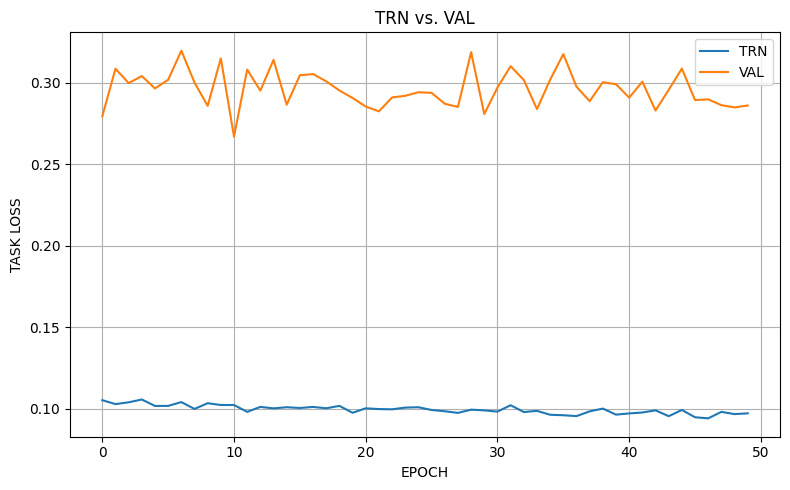

In [59]:
utils.vis.plot_loss(history, 'TASK LOSS')

# Test

In [60]:
TRUE_COL_LIST = [DEFAULT_USER_COL, DEFAULT_ITEM_COL, DEFAULT_LABEL_COL]
PRED_COL_LIST = [DEFAULT_USER_COL, DEFAULT_ITEM_COL, DEFAULT_PREDICTION_COL]

### TST Data

In [61]:
kwargs = dict(
    tst_loader=tst_loader,
)

result_tst = loop.predict(**kwargs)

TST: 100%|██████████| 6117/6117 [00:10<00:00, 559.53it/s]


In [62]:
TOP_K = 5

kwargs = dict(
    model_name=model.model_name,
    origin=data,
    rating_true=result_tst[TRUE_COL_LIST],
    rating_pred=result_tst[PRED_COL_LIST],
    k=TOP_K,
)

eval = ranking.metrics.eval_top_k(**kwargs)

HR@5: 0.536052
PRECISION@5: 0.117205
RECALL@5: 0.476404
MAP@5: 0.289178
NDCG@5: 0.346863
AGGDIV@5: 0.151019
MEAN NOVELTY@5: 11.025586
MEAN SERENDIPITY@5: 0.111984
PERSONALIZATION@5: 0.995753


In [63]:
TOP_K = 10

kwargs = dict(
    model_name=model.model_name,
    origin=data,
    rating_true=result_tst[TRUE_COL_LIST],
    rating_pred=result_tst[PRED_COL_LIST],
    k=TOP_K,
)

eval = ranking.metrics.eval_top_k(**kwargs)

HR@10: 0.696420
PRECISION@10: 0.079960
RECALL@10: 0.633383
MAP@10: 0.312960
NDCG@10: 0.399932
AGGDIV@10: 0.086052
MEAN NOVELTY@10: 11.269907
MEAN SERENDIPITY@10: 0.075535
PERSONALIZATION@10: 0.993760


In [64]:
TOP_K = 15

kwargs = dict(
    model_name=model.model_name,
    origin=data,
    rating_true=result_tst[TRUE_COL_LIST],
    rating_pred=result_tst[PRED_COL_LIST],
    k=TOP_K,
)

eval = ranking.metrics.eval_top_k(**kwargs)

HR@15: 0.781701
PRECISION@15: 0.061644
RECALL@15: 0.720878
MAP@15: 0.321203
NDCG@15: 0.424627
AGGDIV@15: 0.058810
MEAN NOVELTY@15: 11.428517
MEAN SERENDIPITY@15: 0.057534
PERSONALIZATION@15: 0.992123


In [65]:
TOP_K = 20

kwargs = dict(
    model_name=model.model_name,
    origin=data,
    rating_true=result_tst[TRUE_COL_LIST],
    rating_pred=result_tst[PRED_COL_LIST],
    k=TOP_K,
)

eval = ranking.metrics.eval_top_k(**kwargs)

HR@20: 0.832173
PRECISION@20: 0.050597
RECALL@20: 0.775285
MAP@20: 0.325117
NDCG@20: 0.438750
AGGDIV@20: 0.044331
MEAN NOVELTY@20: 11.548682
MEAN SERENDIPITY@20: 0.046818
PERSONALIZATION@20: 0.990694


In [66]:
TOP_K = 50

kwargs = dict(
    model_name=model.model_name,
    origin=data,
    rating_true=result_tst[TRUE_COL_LIST],
    rating_pred=result_tst[PRED_COL_LIST],
    k=TOP_K,
)

eval = ranking.metrics.eval_top_k(**kwargs)

HR@50: 0.956738
PRECISION@50: 0.025266
RECALL@50: 0.922672
MAP@50: 0.331648
NDCG@50: 0.471410
AGGDIV@50: 0.017742
MEAN NOVELTY@50: 11.930506
MEAN SERENDIPITY@50: 0.022327
PERSONALIZATION@50: 0.982899


In [67]:
TOP_K = 100

kwargs = dict(
    model_name=model.model_name,
    origin=data,
    rating_true=result_tst[TRUE_COL_LIST],
    rating_pred=result_tst[PRED_COL_LIST],
    k=TOP_K,
)

eval = ranking.metrics.eval_top_k(**kwargs)

HR@100: 1.000000
PRECISION@100: 0.013896
RECALL@100: 0.981617
MAP@100: 0.333185
NDCG@100: 0.482792
AGGDIV@100: 0.008871
MEAN NOVELTY@100: 12.248932
MEAN SERENDIPITY@100: 0.011397
PERSONALIZATION@100: 0.971640


### Leave-One-Out Data

In [68]:
kwargs = dict(
    tst_loader=loo_loader,
)

result_loo = loop.predict(**kwargs)

TST: 100%|██████████| 5541/5541 [00:08<00:00, 619.21it/s]


In [69]:
TOP_K = 5

kwargs = dict(
    model_name=model.model_name,
    origin=data,
    rating_true=result_loo[TRUE_COL_LIST],
    rating_pred=result_loo[PRED_COL_LIST],
    k=TOP_K,
)

eval = ranking.metrics.eval_top_k(**kwargs)

HR@5: 0.483848
PRECISION@5: 0.096770
RECALL@5: 0.483848
MAP@5: 0.293371
NDCG@5: 0.340618
AGGDIV@5: 0.117199
MEAN NOVELTY@5: 11.090682
MEAN SERENDIPITY@5: 0.093304
PERSONALIZATION@5: 0.995961


In [70]:
TOP_K = 10

kwargs = dict(
    model_name=model.model_name,
    origin=data,
    rating_true=result_loo[TRUE_COL_LIST],
    rating_pred=result_loo[PRED_COL_LIST],
    k=TOP_K,
)

eval = ranking.metrics.eval_top_k(**kwargs)

HR@10: 0.654395
PRECISION@10: 0.065439
RECALL@10: 0.654395
MAP@10: 0.316284
NDCG@10: 0.395920
AGGDIV@10: 0.063743
MEAN NOVELTY@10: 11.336982
MEAN SERENDIPITY@10: 0.062389
PERSONALIZATION@10: 0.994071


In [71]:
TOP_K = 15

kwargs = dict(
    model_name=model.model_name,
    origin=data,
    rating_true=result_loo[TRUE_COL_LIST],
    rating_pred=result_loo[PRED_COL_LIST],
    k=TOP_K,
)

eval = ranking.metrics.eval_top_k(**kwargs)

HR@15: 0.740119
PRECISION@15: 0.049341
RECALL@15: 0.740119
MAP@15: 0.323042
NDCG@15: 0.418613
AGGDIV@15: 0.042868
MEAN NOVELTY@15: 11.499716
MEAN SERENDIPITY@15: 0.046430
PERSONALIZATION@15: 0.992510


In [72]:
TOP_K = 20

kwargs = dict(
    model_name=model.model_name,
    origin=data,
    rating_true=result_loo[TRUE_COL_LIST],
    rating_pred=result_loo[PRED_COL_LIST],
    k=TOP_K,
)

eval = ranking.metrics.eval_top_k(**kwargs)

HR@20: 0.800938
PRECISION@20: 0.040047
RECALL@20: 0.800938
MAP@20: 0.326474
NDCG@20: 0.432997
AGGDIV@20: 0.032196
MEAN NOVELTY@20: 11.619774
MEAN SERENDIPITY@20: 0.037295
PERSONALIZATION@20: 0.991082
